# Set up

In [1]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.5 MB/s eta 0:00:00


In [2]:
pip install pandas openpyxl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest
import pingouin as pg
import pandas as pd

In [4]:
ruta = '/content/drive/MyDrive/Doctorado LLC/Guaraní Ordenado/comportamentales/data_behavioral/' #change to where data_behavioral folder is saved
claves = ['GH',
'KRK',
'CB',
'RAC',
'MAV',
'CAS',
'MCI',
'MT',
'VRR',
'ACM',
'SI',
'IS',
'EDA',
'DK',
'MCH',
'SMD',
'NP',
'MGM',
'AH',
'MA',
'GES',
'FM',
'TES',
'VAB']


In [5]:
from pathlib import Path

directory = Path(ruta)  # e.g., Path('./myfolder')
files = sorted([f.name for f in directory.iterdir() if f.is_file()])

print(files)

['000100_guarani3_2023-10-31_08h29.52.242.xlsx', '000101_guarani3_2023-10-31_10h42.09.755.xlsx', '000102_guarani3_2023-11-04_12h09.11.311.xlsx', '000103_guarani3_2023-11-05_16h22.13.871.xlsx', '000104_guarani3_2023-11-07_10h51.22.060.xlsx', '000105_guarani3_2023-11-08_10h17.07.255.xlsx', '000106_guarani3_2023-11-11_16h05.08.074.xlsx', '000107_guarani3_2023-11-14_12h27.53.816.xlsx', '000108_guarani3_2023-11-14_19h50.42.184.xlsx', '000109_guarani3_2023-11-15_09h45.39.371.xlsx', '000110_guarani3_2023-11-15_11h15.01.640.xlsx', '000111_guarani3_2023-11-15_15h07.59.581.xlsx', '000113_guarani3_2023-11-15_18h01.19.231.xlsx', '000114_guarani3_2023-11-16_09h22.46.645.xlsx', '000115_guarani3_2023-11-18_09h23.46.661.xlsx', '000116_guarani3_2023-11-18_12h47.47.293.xlsx', '000117_guarani3_2023-11-22_17h52.31.160.xlsx', '000118_guarani3_2023-11-25_11h32.40.800.xlsx', '000119_guarani3_2023-12-01_08h58.18.260.xlsx', '000120_guarani3_2023-12-11_17h58.06.320.xlsx', '000121_guarani3_2023-12-15_10h07.29.41

In [6]:
import pandas as pd

dfs = pd.DataFrame()

for file in files:

  df = pd.read_excel(ruta+file, sheet_name = 'P1', usecols = [0,1,2,3,6,10], nrows=61,
                       header=None, names=['word', 'categ', 'prime','corrAns','correct','rt'], engine='openpyxl')
  df = df[df['word'] != 'word']
  df_file = df[df['rt'].apply(lambda x: isinstance(x, float))]

  for sheet in ['P2','P3','P4']:

    df = pd.read_excel(ruta+file, sheet_name = sheet, usecols = [0,1,2,3,6,10], nrows=61,
                       header=None, names=['word', 'categ', 'prime','corrAns','correct','rt'], engine='openpyxl')
    df = df[df['word'] != 'word']
    df_sheet = df[df['rt'].apply(lambda x: isinstance(x, float))]

    df_file = pd.concat([df_file , df_sheet], ignore_index=True)

  df_file['file'] = file

  dfs = pd.concat([dfs , df_file], ignore_index=True)

print(dfs)

          word categ       prime corrAns correct        rt  \
0      YVYPÓRA     1      hombre   right       1   1.31709   
1        OÑE'Ẽ     1       decir   right       0  1.683698   
2       AGUYJE     1    gratitud   right       0  1.633646   
3          TÍO     3     familia   right       1  1.483718   
4     ARANDUKA     1  biblioteca   right       1  1.267034   
...        ...   ...         ...     ...     ...       ...   
5721   CAMELLO     3      joroba   right       1  1.217148   
5722    VAKAME     2        vaca   right       1  1.250405   
5723       RÍO     3         pez   right       1  1.267032   
5724      MERÕ     2      sandía   right       1  1.233702   
5725         Y     1         río   right       1  1.650583   

                                              file  
0     000100_guarani3_2023-10-31_08h29.52.242.xlsx  
1     000100_guarani3_2023-10-31_08h29.52.242.xlsx  
2     000100_guarani3_2023-10-31_08h29.52.242.xlsx  
3     000100_guarani3_2023-10-31_08h29.52.2

# Accuracy

## Figure

In [7]:
accs = []
accs_rel = []
accs_no_rel = []
in_categ = [0,39,41,40]

for suj in files:
  for i in range(1,4):
    accs_rel += [[suj,i,dfs[(dfs['file']==suj) & (dfs['corrAns']=='right')  & (dfs['categ'] == i)]['correct'].sum()/in_categ[i]]]
    accs_no_rel += [[suj,i,dfs[(dfs['file']==suj) & (dfs['corrAns']=='left')  & (dfs['categ'] == i)]['correct'].sum()/in_categ[i]]]
    accs += [[i,dfs[(dfs['file']==suj) & (dfs['categ'] == i)]['correct'].sum()/(in_categ[i]*2)]]
accs = np.array(accs)
accs_rel = pd.DataFrame(accs_rel, columns = ['file','condition','acc'])
accs_no_rel = pd.DataFrame(accs_no_rel, columns = ['file','condition','acc'])

In [8]:
# Step 2: Reshape DataFrame
df_melted = accs_no_rel.melt(id_vars=['condition', 'acc'], value_vars=['file'], var_name='Column', value_name='Value')
# Step 3: Export to Excel
df_melted.to_excel('output.xlsx', index=False)

In [9]:
# Execute the cell that defines the concat_with_origin function
def concat_with_origin(df1, df2, origin1=0, origin2=1):
    """
    Concatenates two pandas DataFrames and adds a column indicating the origin.

    Args:
        df1: The first DataFrame.
        df2: The second DataFrame.
        origin1: The value to use in the origin column for rows from df1.
        origin2: The value to use in the origin column for rows from df2.

    Returns:
        A new DataFrame with the concatenated data and an 'origin' column.
    """
    df1_copy = df1.copy()
    df2_copy = df2.copy()
    df1_copy['relatedness'] = origin1
    df2_copy['relatedness'] = origin2

    concatenated_df = pd.concat([df1_copy, df2_copy], ignore_index=True)
    return concatenated_df

In [10]:
# Concatenate the two DataFrames with an origin column
accs_combined = concat_with_origin(accs_no_rel, accs_rel, origin1='no_rel', origin2='rel')

# Export the combined DataFrame to an Excel file
accs_combined.to_excel('accs_combined.xlsx', index=False)

In [11]:
# Acc avg by subject
acc_sujeto = []
for i in range(len(claves)):
  acc_sujeto += [(accs[3*i,1]+accs[3*i+1,1]+accs[3*i+2,1])/3]
acc_sujeto = np.array(acc_sujeto)
rtas_bien = acc_sujeto*240

In [12]:
n = 240
p0 = 0.5
test = []
i=0
for k in rtas_bien.astype(int):
  test = binomtest(k, n, p=p0, alternative='greater')
  if test.pvalue>=0.05:
    print(f'{claves[i]} does NOT answer better than randomness.')
  else:
    print(f'{claves[i]} answers better than randomness.')
  i+=1

GH answers better than randomness.
KRK answers better than randomness.
CB answers better than randomness.
RAC answers better than randomness.
MAV answers better than randomness.
CAS answers better than randomness.
MCI answers better than randomness.
MT answers better than randomness.
VRR answers better than randomness.
ACM answers better than randomness.
SI answers better than randomness.
IS answers better than randomness.
EDA answers better than randomness.
DK answers better than randomness.
MCH answers better than randomness.
SMD answers better than randomness.
NP answers better than randomness.
MGM answers better than randomness.
AH answers better than randomness.
MA answers better than randomness.
GES answers better than randomness.
FM answers better than randomness.
TES answers better than randomness.
VAB answers better than randomness.


In [13]:
accs_concat = concat_with_origin(accs_no_rel,accs_rel, origin1=0, origin2=1)

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot to wide format per subject per condition
wide = accs_concat.pivot_table(index='file', columns=['condition', 'relatedness'], values='acc')

# Calculate residuals or differences (e.g., A1-B1 vs A2-B1, etc.)
# Example: difference between A1-B1 and A2-B1
diff = wide[(1, 0)] - wide[(2, 0)]

# Shapiro-Wilk test
stat, p = stats.shapiro(diff)
print(f"Shapiro-Wilk p-value: {p:.4f}")

Shapiro-Wilk p-value: 0.0075


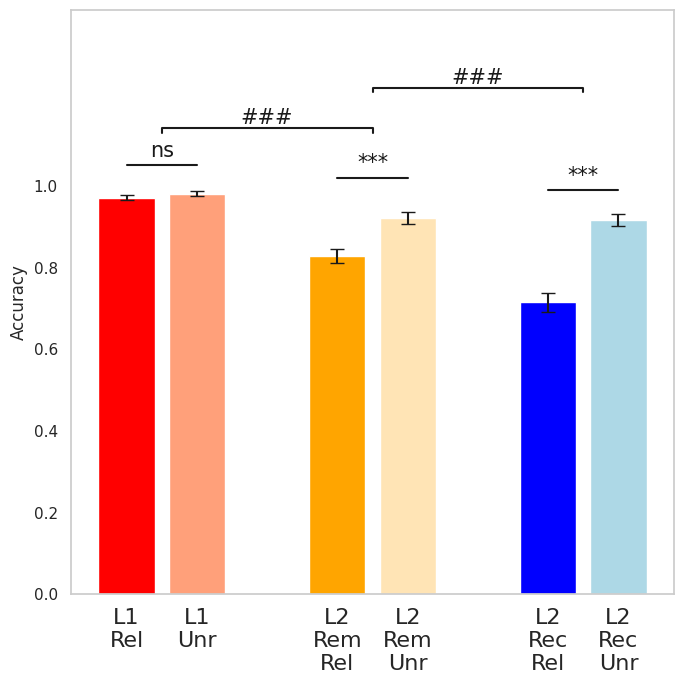

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -------------------------
# Defs
# -------------------------
cond1_si = accs_rel[accs_rel['condition']==2]['acc'].reset_index(drop=True) # Reciente
cond2_si = accs_rel[accs_rel['condition']==1]['acc'].reset_index(drop=True) # Remota
cond3_si = accs_rel[accs_rel['condition']==3]['acc'].reset_index(drop=True) # Español

cond1_no = accs_no_rel[accs_no_rel['condition']==2]['acc'].reset_index(drop=True) # Reciente
cond2_no = accs_no_rel[accs_no_rel['condition']==1]['acc'].reset_index(drop=True) # Remota
cond3_no = accs_no_rel[accs_no_rel['condition']==3]['acc'].reset_index(drop=True) # Español

# Aggr data
data = [cond3_si, cond3_no, cond2_si, cond2_no, cond1_si, cond1_no]
labels = ['L1\nRel','L1\nUnr',
          'L2\nRem\nRel','L2\nRem\nUnr',
          'L2\nRec\nRel','L2\nRec\nUnr',
          ]

means = [np.mean(d) for d in data]
sems = [stats.sem(d) for d in data]

# -------------------------
# barplot
# -------------------------
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))

x_positions = [0, 1,   # L2 Recent
               3, 4,   # L2 Remote
               6, 7]   # L1

bars = ax.bar(x_positions, means, yerr=sems, capsize=5,
              color=['red','lightsalmon', 'orange','moccasin','blue','lightblue'])

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, fontsize=16)
plt.ylabel("Accuracy")

plt.tight_layout()

# -------------------------
# Comparisons
# -------------------------

comparisons = [
    ((0, 1), 0.19, "†"),     # rec rel vs rec unrel
    ((3, 4), 0.0004,"‡"),   # rem rel vs rem unrel
    ((6, 7), 0.0,"#"),     # l1 rel vs l1 unrel
]

def get_significance_label(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

y_offset = 0.0
line_spacing = 0.03
base_height = max(means)+0.1

for i, ((x1, x2), pval, letter) in enumerate(comparisons):
    if pval <= 5:
        y = base_height - (i + 1) * line_spacing
        h = y_offset

        # Línea horizontal
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')

        # Etiqueta
        ax.text((x1 + x2) * 0.5, y + h + 0.01,
                get_significance_label(pval),
                ha='center', va='bottom', color='k',fontsize=15)

# -------------------------
# Comparisons between groups
# -------------------------
comparisons_groups = [
    ((0.5, 3.5), 0.0, "###"),   # Recent vs Remote
    ((3.5, 6.5), 0.19,"###"),   # Remote vs L1
    # ((0.5, 6.5), 0.0004,"###"), # Recent vs L1 (ejemplo)
]

y_offset = 0.01
line_spacing = 0.04
base_height = max(means) + 0.05

t = 0
for (x1, x2), pval, letter in comparisons_groups:
    if pval <= 5:
        y = base_height + (t + 1) * line_spacing * 2.5
        h = y_offset

        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')


        ax.text((x1 + x2) * 0.5, y + h, letter,
                ha='center', va='bottom', color='k', fontsize=15)
        t += 1

ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.set_ylim(0, base_height + (len(comparisons_groups) + 3) * line_spacing * 2)

plt.tight_layout()
plt.grid(False)
plt.show()


## Statistical checks

In [16]:
from scipy.stats import shapiro
from scipy.stats import bartlett

df = pd.DataFrame()


df['diff_12'] = cond1_si - cond2_si
df['diff_13'] = cond1_si - cond3_si
df['diff_23'] = cond2_si - cond3_si
df['diffno_12'] = cond1_no - cond2_no
df['diffno_13'] = cond1_no - cond3_no
df['diffno_23'] = cond2_no - cond3_no
df['diff1_rel'] = cond1_si -cond1_no
df['diff2_rel'] = cond2_si -cond2_no
df['diff3_rel'] = cond3_si -cond3_no

# Test de normalidad para cada diferencia
for col in ['diff_12', 'diff_13', 'diff_23','diffno_12','diffno_13','diffno_23','diff1_rel','diff2_rel','diff3_rel']:
    stat, p = shapiro(df[col])
    print(f"{col}: p = {p:.4f} → {'Normal' if p > 0.05 else 'No normal'}")

i=0
for df in [cond1_si,cond1_no,cond2_si,cond2_no,cond3_si,cond3_no]:
    stat, p = shapiro(df)
    print(f"{i//2+1,(i+1)%2}: p = {p:.4f} → {'Normal' if p > 0.05 else 'No normal'}")
    i+=1

diff_12: p = 0.5460 → Normal
diff_13: p = 0.0711 → Normal
diff_23: p = 0.5196 → Normal
diffno_12: p = 0.0075 → No normal
diffno_13: p = 0.0269 → No normal
diffno_23: p = 0.0034 → No normal
diff1_rel: p = 0.3942 → Normal
diff2_rel: p = 0.8933 → Normal
diff3_rel: p = 0.0009 → No normal
(1, 1): p = 0.1155 → Normal
(1, 0): p = 0.0065 → No normal
(2, 1): p = 0.2342 → Normal
(2, 0): p = 0.0009 → No normal
(3, 1): p = 0.0006 → No normal
(3, 0): p = 0.0000 → No normal


## ANOVA

In [17]:
# ANOVA
aov = pg.rm_anova(dv='acc', within=['condition', 'relatedness'], subject='file', data=accs_concat, detailed=True)
print(aov)

avg_data = accs_concat.groupby(['file', 'condition'])['acc'].mean().reset_index()
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=avg_data['acc'],
                          groups=avg_data['condition'],
                          alpha=0.05)
print(tukey)
avg_data_rel = accs_concat.groupby(['file', 'relatedness'])['acc'].mean().reset_index()

tukey = pairwise_tukeyhsd(endog=avg_data_rel['acc'],
                          groups=avg_data_rel['relatedness'],
                          alpha=0.05)
print(tukey)

pairwise = pg.pairwise_tests(dv='acc', within='condition', subject='file', data=accs_concat,
                                padjust='bonferroni', effsize='cohen')
print(pairwise)

pairwise = pg.pairwise_tests(dv='acc', within='relatedness', subject='file', data=accs_concat,
                                padjust='bonferroni', effsize='cohen')
print(pairwise)

                    Source        SS  ddof1  ddof2        MS          F  \
0                condition  0.628390      2     46  0.314195  84.752863   
1              relatedness  0.371026      1     23  0.371026  55.870895   
2  condition * relatedness  0.224494      2     46  0.112247  29.832177   

          p-unc     p-GG-corr       ng2       eps  
0  3.748672e-16  7.824953e-16  0.459117  0.977016  
1  1.347876e-07  1.347876e-07  0.333858  1.000000  
2  4.932586e-09  1.055367e-08  0.232685  0.952285  


/usr/local/lib/python3.12/dist-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/usr/local/lib/python3.12/dist-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0589 0.0011 -0.0968 -0.021   True
     1      3   0.1011    0.0  0.0632  0.139   True
     2      3     0.16    0.0  0.1221 0.1979   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.1015   0.0 -0.1327 -0.0704   True
---------------------------------------------------
    Contrast  A  B  Paired  Parametric          T   dof alternative  \
0  condition  1  2    True        True   4.599273  23.0   two-sided   
1  condition  1  3    True        True  -8.832425  23.0   two-sided   
2  condition  2  3    True        True -12.327590  23.0   two-sided   

          p-unc        p-corr    p-adjust       BF10     cohen  
0  1.263717e-04  3.791152e

## Post-hocs

In [18]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# Subset data for B1
data_b1 = accs_concat[accs_concat['relatedness'] == 0]
pivot_b1 = data_b1.pivot(index='file', columns='condition', values='acc')

# Do pairwise t-tests for A within B1
pairs = [(1,2),(2,3),(1,3)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of Exposure within Not Related:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")



Effect of Exposure within Not Related:
1 vs 2: p = 0.6444, adjusted p = 0.6444
2 vs 3: p = 0.0001, adjusted p = 0.0004
1 vs 3: p = 0.0003, adjusted p = 0.0007


In [19]:
pg.compute_effsize(pivot_b1[1],pivot_b1[2], eftype='cohen')

np.float64(0.06025171638264839)

In [20]:
data_b2 = accs_concat[accs_concat['relatedness'] == 1]
pivot_b2 = data_b2.pivot(index='file', columns='condition', values='acc')

pvals_b2 = [ttest_rel(pivot_b2[a], pivot_b2[b]).pvalue for a, b in pairs]
_, pvals_b2_adj, _, _ = multipletests(pvals_b2, method='holm')

print("\nEffect of Exposure within Related:")
for (a, b), p, p_adj in zip(pairs, pvals_b2, pvals_b2_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")



Effect of Exposure within Related:
1 vs 2: p = 0.0001, adjusted p = 0.0001
2 vs 3: p = 0.0000, adjusted p = 0.0000
1 vs 3: p = 0.0000, adjusted p = 0.0000


In [21]:
# Subset data for A1
data_b1 = accs_concat[accs_concat['condition'] == 1]
pivot_b1 = data_b1.pivot(index='file', columns='relatedness', values='acc')

# Do pairwise t-tests for B within A1
pairs = [(0,1)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of relatedness within Remote:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of relatedness within Remote:
0 vs 1: p = 0.0004, adjusted p = 0.0004


In [22]:
# Subset data for A2
data_b1 = accs_concat[accs_concat['condition'] == 2]
pivot_b1 = data_b1.pivot(index='file', columns='relatedness', values='acc')

# Do pairwise t-tests for B within A2
pairs = [(0,1)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of relatedness within Recent:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of relatedness within Recent:
0 vs 1: p = 0.0000, adjusted p = 0.0000


In [23]:
# Subset data for A3
data_b1 = accs_concat[accs_concat['condition'] == 3]
pivot_b1 = data_b1.pivot(index='file', columns='relatedness', values='acc')

# Do pairwise t-tests for B within A3
pairs = [(0,1)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of relatedness within Spanish:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of relatedness within Spanish:
0 vs 1: p = 0.1953, adjusted p = 0.1953


In [24]:
pg.compute_effsize(pivot_b1[0],pivot_b1[1], eftype='cohen')

np.float64(0.3196957902261861)

# RT

## Rejection

In [25]:

stats = dfs.groupby('file')['rt'].agg(['mean', 'std']).reset_index()


dfs = dfs.merge(stats, on='file')


dfs['lower_bound'] = dfs['mean'] - 2 * dfs['std']
dfs['upper_bound'] = dfs['mean'] + 2 * dfs['std']


fdf = dfs[(dfs['rt'] >= dfs['lower_bound']) & (dfs['rt'] <= dfs['upper_bound'])]



In [26]:
dfs[(dfs['rt'] < dfs['lower_bound']) | (dfs['rt'] > dfs['upper_bound'])]

word categ     prime corrAns correct        rt  \
15       KO'Ẽ     1    mañana   right       1  2.200441   
67      MADRE     3    abuela   right       1  2.100386   
80    OMOÑE'Ẽ     1     libro   right       0  2.783751   
85    MBUJAPE     1   tostada   right       1  2.733722   
125      KURE     2  edificio    left       1  0.617072   
...       ...   ...       ...     ...     ...       ...   
5554  TEMBI'U     2     arroz   right       1  2.433609   
5590     HA'E     1   caballo    left       1  2.233737   
5600    MYMBA     2   tablero    left       1  2.733852   
5604     MERÕ     2       ala    left       1  2.083615   
5605        Y     1     noche    left       1    2.2504   

                                              file      mean       std  \
15    000100_guarani3_2023-10-31_08h29.52.242.xlsx  1.318865  0.348737   
67    000100_guarani3_2023-10-31_08h29.52.242.xlsx  1.318865  0.348737   
80    000100_guarani3_2023-10-31_08h29.52.242.xlsx  1.318865  0.348737   
85    000100_guarani3_2023-10-31_08h29.52.242.xlsx  1.318865  0.348737   
125   000100_guarani3_2023-10-31_08h29.52.242.xlsx  1.318865  0.348737   
...                                            ...       ...       ...   
5554  000124_guarani3_2023-12-26_18h30.04.294.xlsx  1.191504  0.435193   
5590  000124_guarani3_2023-12-26_18h30.04.294.xlsx  1.191504  0.435193   
5600  000124_guarani3_2023-12-26_18h30.04.294.xlsx  1.191504  0.435193   
5604  000124_guarani3_2023-12-26_18h30.04.294.xlsx  1.191504  0.435193   
5605  000124_guarani3_2023-12-26_18h30.04.294.xlsx  1.191504  0.435193   

     lower_bound upper_bound  
15       0.62139    2.016339  
67       0.62139    2.016339  
80       0.62139    2.016339  
85       0.62139    2.016339  
125      0.62139    2.016339  
...          ...         ...  
5554    0.321118     2.06189  
5590    0.321118     2.06189  
5600    0.321118     2.06189  
5604    0.321118     2.06189  
5605    0.321118     2.06189  

[275 rows x 11 columns]

In [27]:
for i in range(1,4):
  for j in ['left','right']:
    print(i,j)
    print(len(fdf[(fdf['corrAns']==j) & (fdf['correct']==1) & (fdf['categ'] == i)]['rt']))

1 left
815
1 right
728
2 left
854
2 right
680
3 left
921
3 right
920


In [28]:
rts = []
rts_rel = []
rts_no_rel = []
rts_SD = []
rts_rel_SD = []
rts_no_rel_SD = []


for file in files:
  for i in range(1,4):
    rts_rel += [[file, i, fdf[(fdf['file']==file) & (fdf['corrAns']=='right') & (fdf['correct']==1) & (fdf['categ'] == i)]['rt'].mean()]]
    rts_no_rel += [[file,i, fdf[(fdf['file']==file) & (fdf['corrAns']=='left') & (fdf['correct']==1) & (fdf['categ'] == i)]['rt'].mean()]]
    rts += [[file,i, fdf[(fdf['file']==file) & (fdf['correct'] == 1) & (fdf['categ'] == i)]['rt'].mean()]]

rts = pd.DataFrame(rts,columns=['file','condition','rt'])
rts_no_rel = pd.DataFrame(rts_no_rel,columns=['file','condition','rt'])
rts_rel = pd.DataFrame(rts_rel,columns=['file','condition','rt'])


## Figures and statistics

In [29]:
# Pivot the DataFrame
pivot_rts_no_rel = rts_no_rel.pivot_table(index='file', columns='condition', values='rt')
pivot_rts_no_rel['clave'] = claves

# Export to Excel
#pivot_rts_no_rel.to_excel('rts_no_rel_pivoted.xlsx')

In [30]:
# Pivot the DataFrame
pivot_rts_rel = rts_rel.pivot_table(index='file', columns='condition', values='rt')
pivot_rts_rel['clave'] = claves

# Export to Excel
#pivot_rts_rel.to_excel('rts_rel_pivoted.xlsx')

In [31]:
rts_concat = concat_with_origin(rts_no_rel,rts_rel)

In [32]:
# Add a column to indicate the type of data (rt or acc)
rts_concat['metric_type'] = 'rt'
accs_concat['metric_type'] = 'acc'

# Rename the value columns to a common name
rts_concat = rts_concat.rename(columns={'rt': 'value'})
accs_concat = accs_concat.rename(columns={'acc': 'value'})

# Concatenate the two DataFrames
combined_df = pd.concat([rts_concat, accs_concat], ignore_index=True)

# Display the head of the combined DataFrame
display(combined_df)

file  condition     value  \
0    000100_guarani3_2023-10-31_08h29.52.242.xlsx          1  1.317047   
1    000100_guarani3_2023-10-31_08h29.52.242.xlsx          2  1.353626   
2    000100_guarani3_2023-10-31_08h29.52.242.xlsx          3  1.318713   
3    000101_guarani3_2023-10-31_10h42.09.755.xlsx          1  1.559485   
4    000101_guarani3_2023-10-31_10h42.09.755.xlsx          2  1.644942   
..                                            ...        ...       ...   
283  000123_guarani3_2023-12-15_15h54.34.399.xlsx          2  0.609756   
284  000123_guarani3_2023-12-15_15h54.34.399.xlsx          3  0.975000   
285  000124_guarani3_2023-12-26_18h30.04.294.xlsx          1  0.897436   
286  000124_guarani3_2023-12-26_18h30.04.294.xlsx          2  0.780488   
287  000124_guarani3_2023-12-26_18h30.04.294.xlsx          3  1.000000   

     relatedness metric_type  
0              0          rt  
1              0          rt  
2              0          rt  
3              0          rt  
4              0          rt  
..           ...         ...  
283            1         acc  
284            1         acc  
285            1         acc  
286            1         acc  
287            1         acc  

[288 rows x 5 columns]

In [33]:
# Pivot the combined DataFrame to have 'rt' and 'acc' as columns
pivoted_df = combined_df.pivot_table(index=['file', 'condition', 'relatedness'],
                                     columns='metric_type',
                                     values='value').reset_index()

# Display the head of the pivoted DataFrame
display(pivoted_df.head())

# Print the number of rows in the pivoted DataFrame
print(f"Number of rows in the pivoted DataFrame: {len(pivoted_df)}")

metric_type                                          file  condition  \
0            000100_guarani3_2023-10-31_08h29.52.242.xlsx          1   
1            000100_guarani3_2023-10-31_08h29.52.242.xlsx          1   
2            000100_guarani3_2023-10-31_08h29.52.242.xlsx          2   
3            000100_guarani3_2023-10-31_08h29.52.242.xlsx          2   
4            000100_guarani3_2023-10-31_08h29.52.242.xlsx          3   

metric_type  relatedness       acc        rt  
0                      0  0.974359  1.317047  
1                      1  0.743590  1.301079  
2                      0  0.951220  1.353626  
3                      1  0.731707  1.344812  
4                      0  1.000000  1.318713

Number of rows in the pivoted DataFrame: 144


In [34]:
# Get the unique file names from the pivoted DataFrame
unique_files = pivoted_df['file'].unique()

# Create a mapping from file names to claves, assuming the order matches
file_to_clave = dict(zip(unique_files, claves))

# Map the 'file' column to the 'clave' column
pivoted_df['clave'] = pivoted_df['file'].map(file_to_clave)

# Display the head of the modified DataFrame
display(pivoted_df)

metric_type                                          file  condition  \
0            000100_guarani3_2023-10-31_08h29.52.242.xlsx          1   
1            000100_guarani3_2023-10-31_08h29.52.242.xlsx          1   
2            000100_guarani3_2023-10-31_08h29.52.242.xlsx          2   
3            000100_guarani3_2023-10-31_08h29.52.242.xlsx          2   
4            000100_guarani3_2023-10-31_08h29.52.242.xlsx          3   
..                                                    ...        ...   
139          000124_guarani3_2023-12-26_18h30.04.294.xlsx          1   
140          000124_guarani3_2023-12-26_18h30.04.294.xlsx          2   
141          000124_guarani3_2023-12-26_18h30.04.294.xlsx          2   
142          000124_guarani3_2023-12-26_18h30.04.294.xlsx          3   
143          000124_guarani3_2023-12-26_18h30.04.294.xlsx          3   

metric_type  relatedness       acc        rt clave  
0                      0  0.974359  1.317047    GH  
1                      1  0.743590  1.301079    GH  
2                      0  0.951220  1.353626    GH  
3                      1  0.731707  1.344812    GH  
4                      0  1.000000  1.318713    GH  
..                   ...       ...       ...   ...  
139                    1  0.897436  1.152279   VAB  
140                    0  0.902439  1.378946   VAB  
141                    1  0.780488  1.134814   VAB  
142                    0  1.000000  1.133335   VAB  
143                    1  1.000000  1.134554   VAB  

[144 rows x 6 columns]

In [35]:
# Export the pivoted DataFrame to a CSV file
pivoted_df.to_csv('pivoted_data.csv', index=False)

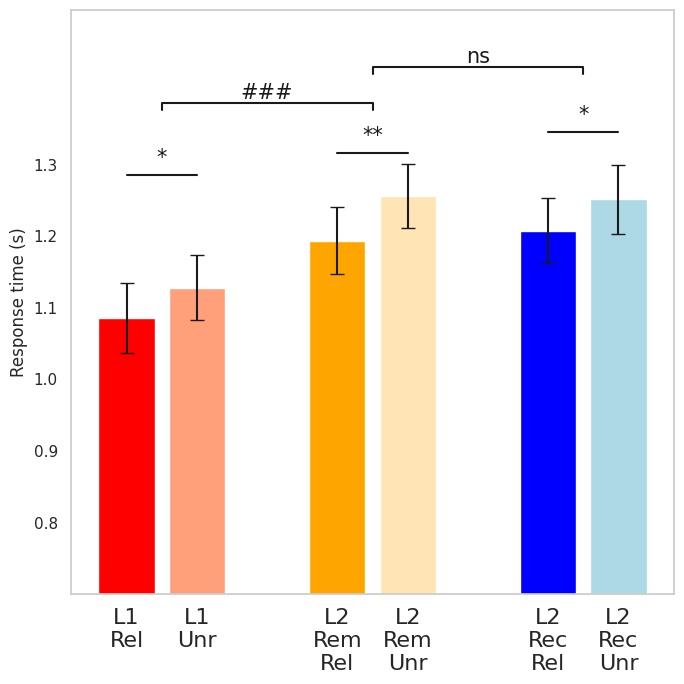

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -------------------------

cond1 = rts[rts['condition']==2]['rt'].reset_index(drop=True) # Reciente
cond2 = rts[rts['condition']==1]['rt'].reset_index(drop=True) # Remota
cond3 = rts[rts['condition']==3]['rt'].reset_index(drop=True) # espanol

cond1_si = rts_rel[rts_rel['condition']==2]['rt'].reset_index(drop=True) # Reciente
cond2_si = rts_rel[rts_rel['condition']==1]['rt'].reset_index(drop=True) # Remota
cond3_si = rts_rel[rts_rel['condition']==3]['rt'].reset_index(drop=True) # espanol

cond1_no = rts_no_rel[rts_no_rel['condition']==2]['rt'].reset_index(drop=True) # Reciente
cond2_no = rts_no_rel[rts_no_rel['condition']==1]['rt'].reset_index(drop=True) # Remota
cond3_no = rts_no_rel[rts_no_rel['condition']==3]['rt'].reset_index(drop=True) # espanol

# Aggr data
data = [cond3_si, cond3_no, cond2_si, cond2_no, cond1_si, cond1_no]
labels = ['L1\nRel','L1\nUnr',
          'L2\nRem\nRel','L2\nRem\nUnr',
          'L2\nRec\nRel','L2\nRec\nUnr',
          ]


means = [np.mean(d) for d in data]
sems = [stats.sem(d) for d in data]

# -------------------------
# Barplots

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))


x_positions = [0, 1,   # L2 Recent
               3, 4,   # L2 Remote
               6, 7]   # L1

bars = ax.bar(x_positions, means, yerr=sems, capsize=5,
              color=['red','lightsalmon', 'orange','moccasin','blue','lightblue'])


ax.set_xticks(x_positions)
ax.set_xticklabels(labels, fontsize=16)

plt.ylabel("Response time (s)")

plt.tight_layout()

# -------------------------
# Significance


comparisons = [
        ((0, 1), 0.02,'‡'),# esp rel vs esp unrel
        ((3, 4), 0.009,'†'), # rem rel vs rem unrel
        ((6, 7), 0.02,'†'),  # rec rel vs rec unrel
]


def get_significance_label(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

y_offset = 0.0
line_spacing = 0.03
base_height = max(means)

for i, ((x1, x2), pval, letter) in enumerate(comparisons):
    if pval <= 5:
        y = base_height + (i + 1) * line_spacing
        h = y_offset

        # Línea horizontal
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')

        # Etiqueta
        ax.text((x1 + x2) * 0.5, y + h + 0.01,
                get_significance_label(pval),
                ha='center', va='bottom', color='k',fontsize=15)

# -------------------------
# Comparisons between groups
# -------------------------
comparisons_groups = [
    ((0.5, 3.5), 0.0, "###"),   # L1 vs Remote
    ((3.5, 6.5), 0.19,"ns"),   # Remote vs Recent
    # ((0.5, 6.5), 0.0004,"###"), # Recent vs L1
]

y_offset = 0.01
line_spacing = 0.04
base_height = max(means)+0.02

t = 0
for (x1, x2), pval, letter in comparisons_groups:
    if pval <= 5:
        y = base_height + (t*0.5 + 1) * line_spacing * 2.5
        h = y_offset


        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')


        ax.text((x1 + x2) * 0.5, y + h, letter,
                ha='center', va='bottom', color='k', fontsize=15)
        t += 1


ax.set_yticks([0.8,0.9,1.0,1.1,1.2,1.3])
ax.set_ylim(0.7, base_height + (len(comparisons_groups) + 3) * line_spacing*1.2)

plt.tight_layout()
plt.grid(False)
plt.show()

In [38]:
rts_concat

file  condition     value  \
0    000100_guarani3_2023-10-31_08h29.52.242.xlsx          1  1.317047   
1    000100_guarani3_2023-10-31_08h29.52.242.xlsx          2  1.353626   
2    000100_guarani3_2023-10-31_08h29.52.242.xlsx          3  1.318713   
3    000101_guarani3_2023-10-31_10h42.09.755.xlsx          1  1.559485   
4    000101_guarani3_2023-10-31_10h42.09.755.xlsx          2  1.644942   
..                                            ...        ...       ...   
139  000123_guarani3_2023-12-15_15h54.34.399.xlsx          2  1.022851   
140  000123_guarani3_2023-12-15_15h54.34.399.xlsx          3  0.857247   
141  000124_guarani3_2023-12-26_18h30.04.294.xlsx          1  1.152279   
142  000124_guarani3_2023-12-26_18h30.04.294.xlsx          2  1.134814   
143  000124_guarani3_2023-12-26_18h30.04.294.xlsx          3  1.134554   

     relatedness metric_type  
0              0          rt  
1              0          rt  
2              0          rt  
3              0          rt  
4              0          rt  
..           ...         ...  
139            1          rt  
140            1          rt  
141            1          rt  
142            1          rt  
143            1          rt  

[144 rows x 5 columns]

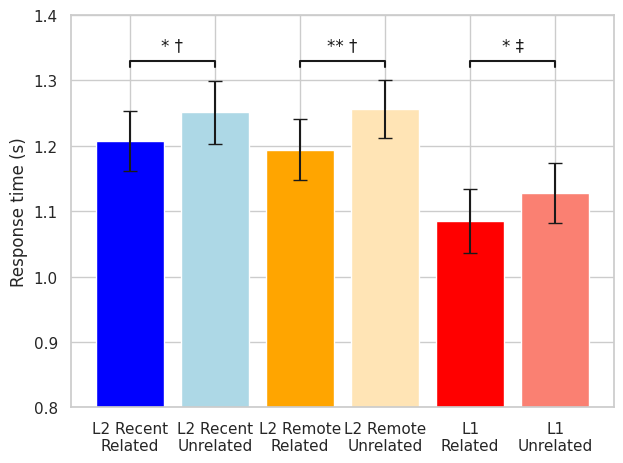

/usr/local/lib/python3.12/dist-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/usr/local/lib/python3.12/dist-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


                    Source        SS  ddof1  ddof2        MS          F  \
0                condition  0.463437      2     46  0.231719  38.181286   
1              relatedness  0.087674      1     23  0.087674  12.844249   
2  condition * relatedness  0.002880      2     46  0.001440   0.464953   

          p-unc     p-GG-corr       ng2       eps  
0  1.688544e-10  4.989021e-09  0.060694  0.824056  
1  1.570822e-03  1.570822e-03  0.012077  1.000000  
2  6.310843e-01  5.816727e-01  0.000401  0.769012  
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0046 0.9972 -0.1497 0.1589  False
     1      3   -0.118  0.167 -0.2723 0.0363  False
     2      3  -0.1226 0.1457 -0.2769 0.0317  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
-----------------------

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


cond1 = rts[rts['condition']==2]['rt'].reset_index(drop=True) # rec
cond2 = rts[rts['condition']==1]['rt'].reset_index(drop=True) # rem
cond3 = rts[rts['condition']==3]['rt'].reset_index(drop=True) # L1

cond1_si = rts_rel[rts_rel['condition']==2]['rt'].reset_index(drop=True) # rec
cond2_si = rts_rel[rts_rel['condition']==1]['rt'].reset_index(drop=True) # rem
cond3_si = rts_rel[rts_rel['condition']==3]['rt'].reset_index(drop=True) # L1

cond1_no = rts_no_rel[rts_no_rel['condition']==2]['rt'].reset_index(drop=True) # rec
cond2_no = rts_no_rel[rts_no_rel['condition']==1]['rt'].reset_index(drop=True) # rem
cond3_no = rts_no_rel[rts_no_rel['condition']==3]['rt'].reset_index(drop=True) # L1


data = [cond1_si,cond1_no, cond2_si,cond2_no,cond3_si,cond3_no]
labels = ['L2 Recent\nRelated','L2 Recent\nUnrelated','L2 Remote\nRelated','L2 Remote\nUnrelated','L1\nRelated','L1\nUnrelated']


means = [np.mean(d) for d in data]
sems = [stats.sem(d) for d in data]

# Barplot
sns.set(style="whitegrid")
fig, ax = plt.subplots()
bars = ax.bar(labels, means, yerr=sems, capsize=5, color=['blue','lightblue', 'orange','moccasin','red', 'salmon'])
plt.tight_layout()
plt.ylim(0.8)
plt.ylabel("Response time (s)")

comparisons = [
    ((0, 1), 0.02,'†'),  # rec rel vs rec unrel
    ((2, 3), 0.009,'†'), # rem rel vs rem unrel
    ((4, 5), 0.02,'‡'), # L1 rel vs L1 unrel
]


def get_significance_label(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

# Plot significance bars and asterisks
y_offset = 0.01        # vertical space for the line
line_spacing = 0.02    # space between stacked lines
base_height = 1.3

for i, ((x1, x2), pval, letter) in enumerate(comparisons):
  if pval<=1:
    if i==0 or i==1 or i==2:
      t=0
    else:
      t=i-2
    y = base_height + (t + 1) * line_spacing
    h = y_offset

    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')

    ax.text((x1 + x2) * 0.5, y + h +0.01, get_significance_label(pval)+' '+letter,
            ha='center', va='bottom', color='k')

# Adjust y-axis to fit the significance markers
ax.set_ylim(0.8, base_height + (len(comparisons) + 2) * line_spacing)

plt.tight_layout()
plt.show()

# ANOVA
aov = pg.rm_anova(dv='value', within=['condition', 'relatedness'], subject='file', data=rts_concat, detailed=True)
print(aov)

avg_data = rts_concat.groupby(['file', 'condition'])['value'].mean().reset_index()
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=avg_data['value'],
                          groups=avg_data['condition'],
                          alpha=0.05)
print(tukey)
avg_data_rel = rts_concat.groupby(['file', 'relatedness'])['value'].mean().reset_index()

tukey = pairwise_tukeyhsd(endog=avg_data_rel['value'],
                          groups=avg_data_rel['relatedness'],
                          alpha=0.05)
print(tukey)

# posthoc with bonferroni
pairwise = pg.pairwise_tests(dv='value', within='condition', subject='file', data=rts_concat,
                                padjust='bonferroni', effsize='cohen')
print(pairwise)

pairwise = pg.pairwise_tests(dv='value', within='relatedness', subject='file', data=rts_concat,
                                padjust='bonferroni', effsize='cohen')
print(pairwise)

# No interaction seen


In [ ]:
rts_concat = rts_concat.rename(columns={'value': 'rt'})

In [44]:
for i in range(1,4):
  avg = rts_concat[rts_concat['condition']==i]['rt'].mean()
  print(f'Condition {i} mean: {avg}')
  sd = rts_concat[rts_concat['condition']==i]['rt'].std()
  print(f'Condition {i} SD: {sd}')

Condition 1 mean: 1.2248214557204464
Condition 1 SD: 0.22256253004743953
Condition 2 mean: 1.2293882798226303
Condition 2 SD: 0.22853354733589296
Condition 3 mean: 1.1068269788281249
Condition 3 SD: 0.22970449635701998


In [45]:
avg = rts_concat[(rts_concat['condition']==1) | (rts_concat['condition']==2)]['rt'].mean()
print(f'Condition 1 or 2 mean: {avg}')
sd = rts_concat[(rts_concat['condition']==1) | (rts_concat['condition']==2)]['rt'].std()
print(f'Condition 1 or 2 SD: {sd}')

Condition 1 or 2 mean: 1.2271048677715382
Condition 1 or 2 SD: 0.2243891979999836


In [46]:
for i in range(1,4):
  for j in [0,1]:
    avg = rts_concat[(rts_concat['condition']==i)&(rts_concat['relatedness']==j)]['rt'].mean()
    print(f'Condition {i} {j} mean: {avg}')
    sd = rts_concat[(rts_concat['condition']==i)&(rts_concat['relatedness']==j)]['rt'].std()
    print(f'Condition {i} {j} SD: {sd}')

Condition 1 0 mean: 1.25580399080468
Condition 1 0 SD: 0.21773547458344572
Condition 1 1 mean: 1.1938389206362128
Condition 1 1 SD: 0.22761760096065395
Condition 2 0 mean: 1.2513034384552812
Condition 2 0 SD: 0.23733782262455896
Condition 2 1 mean: 1.2074731211899794
Condition 2 1 SD: 0.22224845463108295
Condition 3 0 mean: 1.1279537773988813
Condition 3 0 SD: 0.22225907797287986
Condition 3 1 mean: 1.085700180257369
Condition 3 1 SD: 0.23977450182490656


In [47]:
for j in [0,1]:
  avg = rts_concat[(rts_concat['relatedness']==j)]['rt'].mean()
  print(f'Condition {j} mean: {avg}')
  sd = rts_concat[(rts_concat['relatedness']==j)]['rt'].std()
  print(f'Condition {j} SD: {sd}')

Condition 0 mean: 1.2116870688862806
Condition 0 SD: 0.23057800400370113
Condition 1 mean: 1.1623374073611872
Condition 1 SD: 0.23327657804022728


In [48]:
import pandas as pd
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# Example pairwise comparisons
pairs = [(1, 2), (1, 3), (2, 3)]

# Extract subject-wise means for each condition
pivot = rts_concat.pivot_table(index='file', columns='condition', values='rt', aggfunc='mean')

# Paired t-tests for each pair
p_vals = []
for a1, a2 in pairs:
    _, p = ttest_rel(pivot[a1], pivot[a2])
    p_vals.append(p)

# Apply holm corr
reject, p_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='holm')

# Show results
for (a1, a2), p_raw, p_corr, sig in zip(pairs, p_vals, p_corrected, reject):
    print(f"{a1} vs {a2}: p = {p_raw:.4f}, corrected p = {p_corr:.4f}, significant = {sig}")


1 vs 2: p = 0.7015, corrected p = 0.7015, significant = False
1 vs 3: p = 0.0000, corrected p = 0.0000, significant = True
2 vs 3: p = 0.0000, corrected p = 0.0000, significant = True


In [49]:
rts_concat

file  condition        rt  \
0    000100_guarani3_2023-10-31_08h29.52.242.xlsx          1  1.317047   
1    000100_guarani3_2023-10-31_08h29.52.242.xlsx          2  1.353626   
2    000100_guarani3_2023-10-31_08h29.52.242.xlsx          3  1.318713   
3    000101_guarani3_2023-10-31_10h42.09.755.xlsx          1  1.559485   
4    000101_guarani3_2023-10-31_10h42.09.755.xlsx          2  1.644942   
..                                            ...        ...       ...   
139  000123_guarani3_2023-12-15_15h54.34.399.xlsx          2  1.022851   
140  000123_guarani3_2023-12-15_15h54.34.399.xlsx          3  0.857247   
141  000124_guarani3_2023-12-26_18h30.04.294.xlsx          1  1.152279   
142  000124_guarani3_2023-12-26_18h30.04.294.xlsx          2  1.134814   
143  000124_guarani3_2023-12-26_18h30.04.294.xlsx          3  1.134554   

     relatedness metric_type  
0              0          rt  
1              0          rt  
2              0          rt  
3              0          rt  
4              0          rt  
..           ...         ...  
139            1          rt  
140            1          rt  
141            1          rt  
142            1          rt  
143            1          rt  

[144 rows x 5 columns]

In [50]:
import pandas as pd
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# Example pairwise comparisons
pairs = [(0,1)]

for cond in [1,2,3]:
  print(cond)
  # Extract subject-wise means for each condition
  pivot = rts_concat[rts_concat['condition']==cond].pivot_table(index='file', columns='relatedness', values='rt', aggfunc='mean')

  # Paired t-tests for each pair
  p_vals = []
  t_vals = []
  d_vals = []
  for a1, a2 in pairs:
      t, p = ttest_rel(pivot[a1], pivot[a2])
      d = pg.compute_effsize(pivot[a1],pivot[a2], eftype='cohen')
      p_vals.append(p)
      t_vals.append(t)
      d_vals.append(d)
  print(p_vals)
  print(t_vals)
  print(d_vals)
  # Apply Benjamini-Hochberg (FDR) correction
  reject, p_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')

  # Show results
  for (a1, a2), p_raw, p_corr, sig in zip(pairs, p_vals, p_corrected, reject):
      print(f"{a1} vs {a2}: p = {p_raw:.4f}, corrected p = {p_corr:.4f}, significant = {sig}")

1
[np.float64(0.009076748762530491)]
[np.float64(2.849358777730603)]
[np.float64(0.27820542540099125)]
0 vs 1: p = 0.0091, corrected p = 0.0091, significant = True
2
[np.float64(0.029558420549633285)]
[np.float64(2.320162460617249)]
[np.float64(0.19063542390287386)]
0 vs 1: p = 0.0296, corrected p = 0.0296, significant = True
3
[np.float64(0.014459830134314424)]
[np.float64(2.6453454378705894)]
[np.float64(0.18277142548086125)]
0 vs 1: p = 0.0145, corrected p = 0.0145, significant = True


## Statistics assumptions tests

In [51]:
from scipy.stats import shapiro
from scipy.stats import bartlett

df = pd.DataFrame()


df['diff_12'] = cond1_si - cond2_si
df['diff_13'] = cond1_si - cond3_si
df['diff_23'] = cond2_si - cond3_si
df['diffno_12'] = cond1_no - cond2_no
df['diffno_13'] = cond1_no - cond3_no
df['diffno_23'] = cond2_no - cond3_no
df['diff1_rel'] = cond1_si -cond1_no
df['diff2_rel'] = cond2_si -cond2_no
df['diff3_rel'] = cond3_si -cond3_no


for col in ['diff_12', 'diff_13', 'diff_23','diffno_12','diffno_13','diffno_23','diff1_rel','diff2_rel','diff3_rel']:
    stat, p = shapiro(df[col])
    print(f"{col}: p = {p:.4f} → {'Normal' if p > 0.05 else 'No normal'}")

i=0
for df in [cond1_si,cond1_no,cond2_si,cond2_no,cond3_si,cond3_no]:
    stat, p = shapiro(df)
    print(f"{i//2+1,(i+1)%2}: p = {p:.4f} → {'Normal' if p > 0.05 else 'No normal'}")
    i+=1

diff_12: p = 0.0015 → No normal
diff_13: p = 0.0047 → No normal
diff_23: p = 0.0862 → Normal
diffno_12: p = 0.0446 → No normal
diffno_13: p = 0.1119 → Normal
diffno_23: p = 0.5712 → Normal
diff1_rel: p = 0.6728 → Normal
diff2_rel: p = 0.1150 → Normal
diff3_rel: p = 0.0533 → Normal
(1, 1): p = 0.1806 → Normal
(1, 0): p = 0.2517 → Normal
(2, 1): p = 0.2240 → Normal
(2, 0): p = 0.6350 → Normal
(3, 1): p = 0.7544 → Normal
(3, 0): p = 0.0840 → Normal


In [52]:
bartlett(cond1, cond2, cond3) #if p>0.05, homocedasticity is not violated

BartlettResult(statistic=np.float64(0.09162947893173501), pvalue=np.float64(0.9552189101649811))

In [53]:
df_long = rts_concat

# (Mauchly)
sphericity = pg.sphericity(df_long, dv='rt', subject='file', within='condition')
print(sphericity)
# (Mauchly)
sphericity = pg.sphericity(df_long, dv='rt', subject='file', within='relatedness')
print(sphericity)

SpherResults(spher=True, W=np.float64(0.7864906815958335), chi2=np.float64(5.283836898849823), dof=2, pval=np.float64(0.07122449780663542))
(True, nan, nan, 1, 1.0)


In [56]:
df_long

file  condition     value  \
0    000100_guarani3_2023-10-31_08h29.52.242.xlsx          1  0.974359   
1    000100_guarani3_2023-10-31_08h29.52.242.xlsx          2  0.951220   
2    000100_guarani3_2023-10-31_08h29.52.242.xlsx          3  1.000000   
3    000101_guarani3_2023-10-31_10h42.09.755.xlsx          1  0.974359   
4    000101_guarani3_2023-10-31_10h42.09.755.xlsx          2  0.975610   
..                                            ...        ...       ...   
139  000123_guarani3_2023-12-15_15h54.34.399.xlsx          2  0.609756   
140  000123_guarani3_2023-12-15_15h54.34.399.xlsx          3  0.975000   
141  000124_guarani3_2023-12-26_18h30.04.294.xlsx          1  0.897436   
142  000124_guarani3_2023-12-26_18h30.04.294.xlsx          2  0.780488   
143  000124_guarani3_2023-12-26_18h30.04.294.xlsx          3  1.000000   

     relatedness metric_type  
0              0         acc  
1              0         acc  
2              0         acc  
3              0         acc  
4              0         acc  
..           ...         ...  
139            1         acc  
140            1         acc  
141            1         acc  
142            1         acc  
143            1         acc  

[144 rows x 5 columns]

In [58]:

df_long = accs_concat
df_long = df_long.rename(columns={'value': 'acc'})
#(Mauchly)
sphericity = pg.sphericity(df_long, dv='acc', subject='file', within='condition')
print(sphericity)


SpherResults(spher=True, W=np.float64(0.9764751888272821), chi2=np.float64(0.5237306196142043), dof=2, pval=np.float64(0.7696146762761314))


In [59]:
accs_concat

file  condition     value  \
0    000100_guarani3_2023-10-31_08h29.52.242.xlsx          1  0.974359   
1    000100_guarani3_2023-10-31_08h29.52.242.xlsx          2  0.951220   
2    000100_guarani3_2023-10-31_08h29.52.242.xlsx          3  1.000000   
3    000101_guarani3_2023-10-31_10h42.09.755.xlsx          1  0.974359   
4    000101_guarani3_2023-10-31_10h42.09.755.xlsx          2  0.975610   
..                                            ...        ...       ...   
139  000123_guarani3_2023-12-15_15h54.34.399.xlsx          2  0.609756   
140  000123_guarani3_2023-12-15_15h54.34.399.xlsx          3  0.975000   
141  000124_guarani3_2023-12-26_18h30.04.294.xlsx          1  0.897436   
142  000124_guarani3_2023-12-26_18h30.04.294.xlsx          2  0.780488   
143  000124_guarani3_2023-12-26_18h30.04.294.xlsx          3  1.000000   

     relatedness metric_type  
0              0         acc  
1              0         acc  
2              0         acc  
3              0         acc  
4              0         acc  
..           ...         ...  
139            1         acc  
140            1         acc  
141            1         acc  
142            1         acc  
143            1         acc  

[144 rows x 5 columns]

In [60]:
rts_concat

file  condition        rt  \
0    000100_guarani3_2023-10-31_08h29.52.242.xlsx          1  1.317047   
1    000100_guarani3_2023-10-31_08h29.52.242.xlsx          2  1.353626   
2    000100_guarani3_2023-10-31_08h29.52.242.xlsx          3  1.318713   
3    000101_guarani3_2023-10-31_10h42.09.755.xlsx          1  1.559485   
4    000101_guarani3_2023-10-31_10h42.09.755.xlsx          2  1.644942   
..                                            ...        ...       ...   
139  000123_guarani3_2023-12-15_15h54.34.399.xlsx          2  1.022851   
140  000123_guarani3_2023-12-15_15h54.34.399.xlsx          3  0.857247   
141  000124_guarani3_2023-12-26_18h30.04.294.xlsx          1  1.152279   
142  000124_guarani3_2023-12-26_18h30.04.294.xlsx          2  1.134814   
143  000124_guarani3_2023-12-26_18h30.04.294.xlsx          3  1.134554   

     relatedness metric_type  
0              0          rt  
1              0          rt  
2              0          rt  
3              0          rt  
4              0          rt  
..           ...         ...  
139            1          rt  
140            1          rt  
141            1          rt  
142            1          rt  
143            1          rt  

[144 rows x 5 columns]

In [61]:
# Subset data for B1
data_b1 = rts_concat[rts_concat['relatedness'] == 0]
pivot_b1 = data_b1.pivot(index='file', columns='condition', values='rt')

# Do pairwise t-tests for A within B1
pairs = [(1,2),(2,3),(1,3)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='fdr_bh')

print("\nEffect of Exposure within Not Related:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of Exposure within Not Related:
1 vs 2: p = 0.8233, adjusted p = 0.8233
2 vs 3: p = 0.0000, adjusted p = 0.0000
1 vs 3: p = 0.0000, adjusted p = 0.0000


In [62]:
# Subset data for B1
data_b1 = rts_concat[rts_concat['relatedness'] == 1]
pivot_b1 = data_b1.pivot(index='file', columns='condition', values='rt')

# Do pairwise t-tests for A within B1
pairs = [(1,2),(2,3),(1,3)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of Exposure within Related:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of Exposure within Related:
1 vs 2: p = 0.4178, adjusted p = 0.4178
2 vs 3: p = 0.0000, adjusted p = 0.0000
1 vs 3: p = 0.0000, adjusted p = 0.0000


In [63]:
# Subset data for A1
data_b1 = rts_concat[rts_concat['condition'] == 1]
pivot_b1 = data_b1.pivot(index='file', columns='relatedness', values='rt')

# Do pairwise t-tests for B within A1
pairs = [(0,1)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of relatedness within Remote:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of relatedness within Remote:
0 vs 1: p = 0.0091, adjusted p = 0.0091


In [64]:
# Subset data for A1
data_b1 = rts_concat[rts_concat['condition'] == 2]
pivot_b1 = data_b1.pivot(index='file', columns='relatedness', values='rt')

# Do pairwise t-tests for B within A1
pairs = [(0,1)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of relatedness within Recent:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of relatedness within Recent:
0 vs 1: p = 0.0296, adjusted p = 0.0296


In [65]:
# Subset data for A1
data_b1 = rts_concat[rts_concat['condition'] == 3]
pivot_b1 = data_b1.pivot(index='file', columns='relatedness', values='rt')

# Do pairwise t-tests for B within A1
pairs = [(0,1)]
pvals_b1 = [ttest_rel(pivot_b1[a], pivot_b1[b]).pvalue for a, b in pairs]

# Adjust for multiple comparisons (e.g., Holm or FDR)
_, pvals_b1_adj, _, _ = multipletests(pvals_b1, method='holm')

print("\nEffect of relatedness within Spanish:")
for (a, b), p, p_adj in zip(pairs, pvals_b1, pvals_b1_adj):
    print(f"{a} vs {b}: p = {p:.4f}, adjusted p = {p_adj:.4f}")


Effect of relatedness within Spanish:
0 vs 1: p = 0.0145, adjusted p = 0.0145
